<a href="https://colab.research.google.com/github/smlra-kjsce/PyTorch-101/blob/main/Sine%20Function%20Approximation%20in%20PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from torch import nn, optim
from torch.nn import functional as F
from torch.utils.data import TensorDataset, DataLoader

from sklearn.model_selection import train_test_split

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

## Define some hyperparameters

In [ ]:
LR = 1e-6
MAX_EPOCH = 10
BATCH_SIZE = 512

## Defining our model to approximate sine curve

In [ ]:
class SineApproximator(nn.Module):
    def __init__(self):
        super(SineApproximator, self).__init__()
        self.regressor = nn.Sequential(nn.Linear(1, 1024),
                                       nn.ReLU(inplace=True),
                                       nn.Linear(1024, 1024),
                                       nn.ReLU(inplace=True),
                                       nn.Linear(1024, 1))
    def forward(self, x):
        output = self.regressor(x)
        return output

    ## Since I have inherited nn.Module, backward() function is already implemented and I don't need to define it again.

In [ ]:
X = np.random.rand(10**6) * 2 * np.pi
y = np.sin(X)

X_train, X_val, y_train, y_val = map(torch.tensor, train_test_split(X, y, test_size=0.2))
train_dataloader = DataLoader(TensorDataset(X_train.unsqueeze(1), y_train.unsqueeze(1)), batch_size=BATCH_SIZE,
                              pin_memory=True, shuffle=True)
val_dataloader = DataLoader(TensorDataset(X_val.unsqueeze(1), y_val.unsqueeze(1)), batch_size=BATCH_SIZE,
                            pin_memory=True, shuffle=True)

model = SineApproximator().to(device)
optimizer = optim.Adam(model.parameters(), lr=LR)
criterion = nn.MSELoss(reduction="mean")

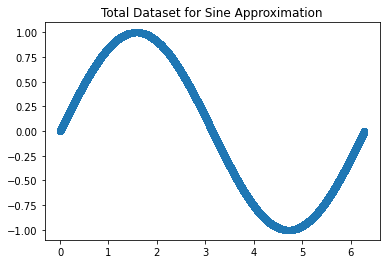

In [ ]:
plt.scatter(X,y)
plt.title('Total Dataset for Sine Approximation');

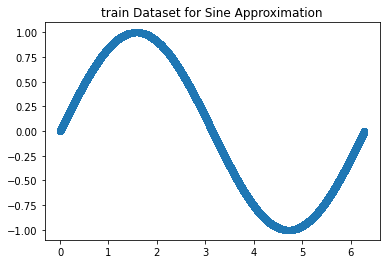

In [ ]:
plt.scatter(X_train.cpu(),y_train.cpu())
plt.title('train Dataset for Sine Approximation');

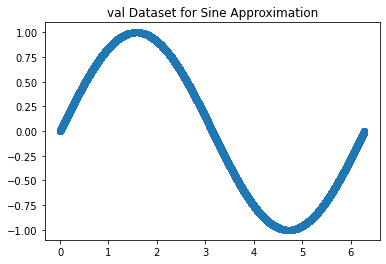

In [ ]:
plt.scatter(X_val.cpu(),y_val.cpu())
plt.title('val Dataset for Sine Approximation');

## Training our model

In [ ]:
train_loss_list = list()
val_loss_list = list()
for epoch in range(MAX_EPOCH):
    print("epoch %d / %d" % (epoch+1, MAX_EPOCH))
    model.train()
    # training loop
    temp_loss_list = list()
    for X_train, y_train in train_dataloader:
        X_train = X_train.type(torch.float32).to(device)
        y_train = y_train.type(torch.float32).to(device)

        optimizer.zero_grad()

        score = model(X_train)
        loss = criterion(input=score, target=y_train)
        loss.backward()

        optimizer.step()

        temp_loss_list.append(loss.detach().cpu().numpy())
    
    temp_loss_list = list()
    for X_train, y_train in train_dataloader:
        X_train = X_train.type(torch.float32).to(device)
        y_train = y_train.type(torch.float32).to(device)

        score = model(X_train)
        loss = criterion(input=score, target=y_train)

        temp_loss_list.append(loss.detach().cpu().numpy())
    
    train_loss_list.append(np.average(temp_loss_list))

    # validation
    model.eval()
    
    temp_loss_list = list()
    for X_val, y_val in val_dataloader:
        X_val = X_val.type(torch.float32).to(device)
        y_val = y_val.type(torch.float32).to(device)

        score = model(X_val)
        loss = criterion(input=score, target=y_val)

        temp_loss_list.append(loss.detach().cpu().numpy())
    
    val_loss_list.append(np.average(temp_loss_list))

    print("\ttrain loss: %.5f" % train_loss_list[-1])
    print("\tval loss: %.5f" % val_loss_list[-1])

epoch 1 / 10
	train loss: 0.09842
	val loss: 0.09853
epoch 2 / 10
	train loss: 0.07372
	val loss: 0.07380
epoch 3 / 10
	train loss: 0.05159
	val loss: 0.05164
epoch 4 / 10
	train loss: 0.03287
	val loss: 0.03290
epoch 5 / 10
	train loss: 0.01913
	val loss: 0.01915
epoch 6 / 10
	train loss: 0.01024
	val loss: 0.01024
epoch 7 / 10
	train loss: 0.00516
	val loss: 0.00516
epoch 8 / 10
	train loss: 0.00249
	val loss: 0.00250
epoch 9 / 10
	train loss: 0.00116
	val loss: 0.00116
epoch 10 / 10
	train loss: 0.00053
	val loss: 0.00053


## Plotting Loss

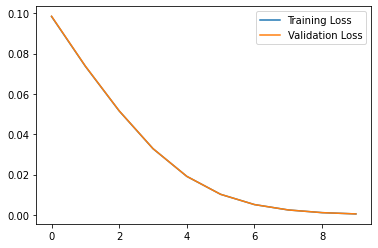

In [ ]:
train_plot = plt.plot(train_loss_list, label="Training Loss")
val_plot = plt.plot(val_loss_list, label="Validation Loss")
plt.legend(loc="upper right");

## Time for prediction!

In [ ]:
model.eval()
prediction = model(X_val)

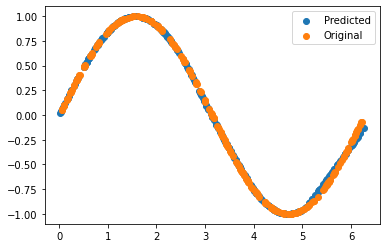

In [ ]:
predicted = plt.scatter(X_val.cpu(), prediction.detach().cpu())
original = plt.scatter(X_train.cpu(), y_train.cpu())
plt.legend((predicted, original), ("Predicted", "Original"));

### So, here we can see that our neural network was able to approximate sine function very well.

## State_dict of model and optimizer

In [ ]:
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

Model's state_dict:
regressor.0.weight 	 torch.Size([1024, 1])
regressor.0.bias 	 torch.Size([1024])
regressor.2.weight 	 torch.Size([1024, 1024])
regressor.2.bias 	 torch.Size([1024])
regressor.4.weight 	 torch.Size([1, 1024])
regressor.4.bias 	 torch.Size([1])
Optimizer's state_dict:
state 	 {0: {'step': 15630, 'exp_avg': tensor([[ 4.6025e-05],
        [ 7.3237e-09],
        [-1.8306e-05],
        ...,
        [ 2.3937e-05],
        [-3.3443e-06],
        [ 6.3547e-06]], device='cuda:0'), 'exp_avg_sq': tensor([[2.7239e-07],
        [5.5221e-15],
        [5.6076e-08],
        ...,
        [3.0065e-08],
        [1.8366e-08],
        [2.7159e-08]], device='cuda:0')}, 1: {'step': 15630, 'exp_avg': tensor([-2.0342e-05,  8.6167e-08,  1.3242e-05,  ..., -1.3676e-05,
         2.4177e-06, -2.2390e-07], device='cuda:0'), 'exp_avg_sq': tensor([2.8005e-08, 6.9960e-13, 2.2978e-09,  ..., 3.1504e-09, 1.0814e-09,
        1.8065e-09], device='cuda:0')}, 2: {'step': 15630, 'exp_avg': tensor([[-9.5109e-

## Saving model using save() and state_dict()

In [ ]:
PATH = '/content/sine.pt'
torch.save(model.state_dict(), PATH)

## Loading model using load() and load_state_dict()

In [ ]:
device = torch.device("cuda")
model = SineApproximator()
model.load_state_dict(torch.load(PATH))
model.to(device)
model.eval()

SineApproximator(
  (regressor): Sequential(
    (0): Linear(in_features=1, out_features=1024, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=1024, out_features=1024, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=1024, out_features=1, bias=True)
  )
)

## Trying pre-trained model for inference/training

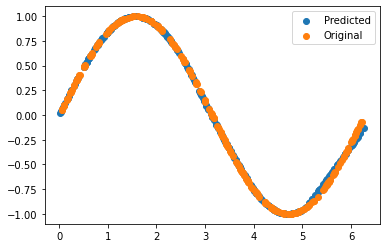

In [ ]:
new_pred = model(X_val)
pred = plt.scatter(X_val.cpu(), new_pred.detach().cpu())
original = plt.scatter(X_train.cpu(), y_train.cpu())
plt.legend((pred, original), ("Predicted", "Original"));